In [ ]:
 # Load All Packages #

import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

# Navigate to Directory #

drive.mount('/content/drive')

path = "/content/drive/MyDrive/DSO 574 assignment/3"

os.chdir(path)

Mounted at /content/drive


In [ ]:
share_data = pd.read_csv("./Nielsen/Share Data 2016 to 2020.csv")

<ipython-input-2-aaf26369ed0d>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  share_data = pd.read_csv("./Nielsen/Share Data 2016 to 2020.csv")


In [ ]:
reach_data = pd.read_csv("./Nielsen/Reach Data 2016 to 2020.csv")

In [ ]:
pd.set_option('display.max_columns', None)

reach_data.head()

,Unnamed: 0,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,AA Reach%,AA Reach Proj(units),AA Average Frequency,AA Average Minutes,Spot AA GRP%,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,0.479660,1462132,2.265144,46.518141,22.312874,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,0.259126,789885,1.491810,60.093212,15.571688,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.107874,6425370,1.004210,23.547228,49.634597,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,2.038779,6214748,1.048416,40.802890,83.188059,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,1.930053,5883323,1.004236,25.132876,48.507782,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx


In [ ]:
reach_data.head()

nielsen_data = reach_data

#AA Reach%,"The unduplicated number of individuals or households viewing a selected time period, program, or group of programs. Reach is expressed as a percentage."



#AA Reach with Program

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by month and find the program with the highest AA Reach % for each month
highest_reach_per_month_2020 = nielsen_data_2020.groupby(nielsen_data_2020['Date'].dt.month)['AA Reach%'].idxmax()

# Get the rows corresponding to the indices of the programs with the highest AA Reach % for each month
programs_with_highest_reach_2020 = nielsen_data_2020.loc[highest_reach_per_month_2020]

# Print the result
print(programs_with_highest_reach_2020[['Date', 'Program', 'AA Reach%']])


             Date        Program  AA Reach%
135015 2020-01-28          NCIS    9.831794
135139 2020-02-11          NCIS    9.698127
135639 2020-03-31          NCIS   11.310662
135783 2020-04-14          NCIS   11.436321
135964 2020-05-01   BLUE BLOODS    8.007451
136189 2020-06-02      NCIS-ENC    6.129067
136428 2020-07-07      NCIS-ENC    5.647628
136632 2020-08-04      NCIS-ENC    5.079341
136820 2020-09-08      NCIS-ENC    4.812536
137025 2020-10-27    THIS IS US    5.234595
137142 2020-11-17          NCIS    8.984769
137279 2020-12-08          NCIS    7.422655


##Unique values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % for each program
program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Reach%'].mean().reset_index()

# Sort programs by AA Reach % in descending order and get the top 10
top_10_programs = program_reach_2020.nlargest(10, 'AA Reach%')
top_10_programs

,Program,AA Reach%
268,NCIS,4.754649
144,FBI,3.905700
97,CHICAGO FIRE,3.675326
99,CHICAGO MED,3.642615
65,BLUE BLOODS,3.626210
392,YOUNG SHELDON,3.460300
101,CHICAGO PD,3.458398
413,911,3.360496
362,THIS IS US,3.309589
183,HAWAII FIVE-0,3.273793


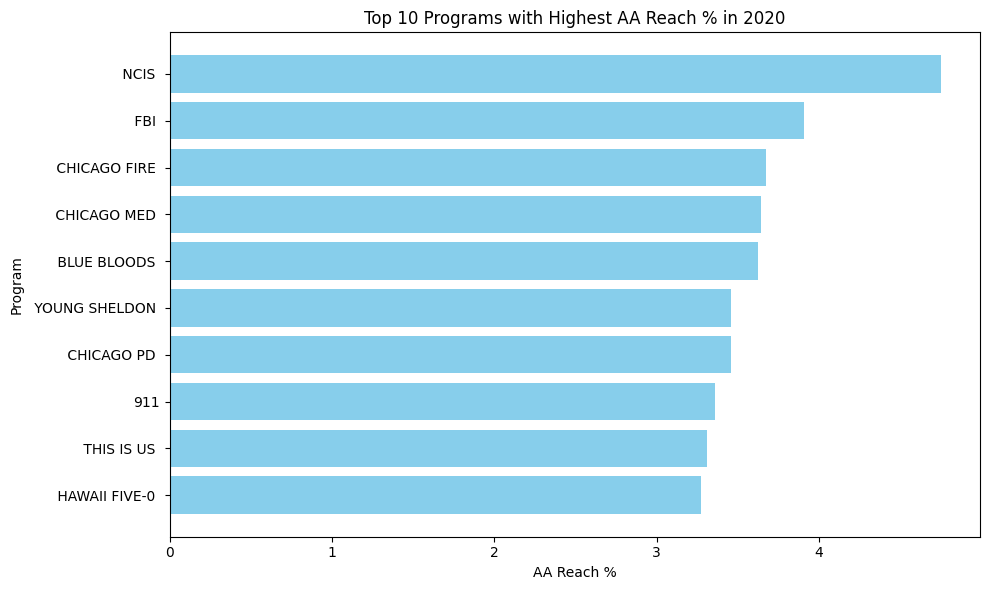

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % for each program
program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Reach%'].mean().reset_index()

# Sort programs by AA Reach % in descending order and get the top 10
top_10_programs = program_reach_2020.nlargest(10, 'AA Reach%')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_programs['Program'], top_10_programs['AA Reach%'], color='skyblue')
plt.title('Top 10 Programs with Highest AA Reach % in 2020')
plt.xlabel('AA Reach %')
plt.ylabel('Program')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest reach at the top
plt.tight_layout()
plt.show()


plotting each program to their originator

In [ ]:
# Assuming your DataFrame is named 'nielsen_data'

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % for each program
program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Reach%'].mean().reset_index()

# Sort programs by AA Reach % in descending order and get the top 10
top_10_programs = program_reach_2020.nlargest(10, 'AA Reach%')

# Merge top 10 programs with original data to get originator for each program
top_10_programs_with_originator = pd.merge(top_10_programs, nielsen_data, on='Program')[['Program', 'Originator']].drop_duplicates()

print(top_10_programs_with_originator)


               Program Originator
0                NCIS        CBS 
1650              FBI        CBS 
2244     CHICAGO FIRE        NBC 
3377      CHICAGO MED        NBC 
4521      BLUE BLOODS        CBS 
6347    YOUNG SHELDON        CBS 
7403       CHICAGO PD        NBC 
8668               911       FOX 
9174       THIS IS US        NBC 
10010   HAWAII FIVE-0        CBS 


#AA Reach with originator

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by originator and calculate total reach for each originator
originator_reach_2020 = nielsen_data_2020.groupby('Originator')['AA Reach%'].sum().reset_index()

# Find the originator with the highest total reach
highest_reach_originator_2020 = originator_reach_2020.loc[originator_reach_2020['AA Reach%'].idxmax()]

print("Originator with the highest reach in 2020:", highest_reach_originator_2020['Originator'])
print("Total reach:", highest_reach_originator_2020['AA Reach%'])


Originator with the highest reach in 2020:  CBS 
Total reach: 17973.533667945154


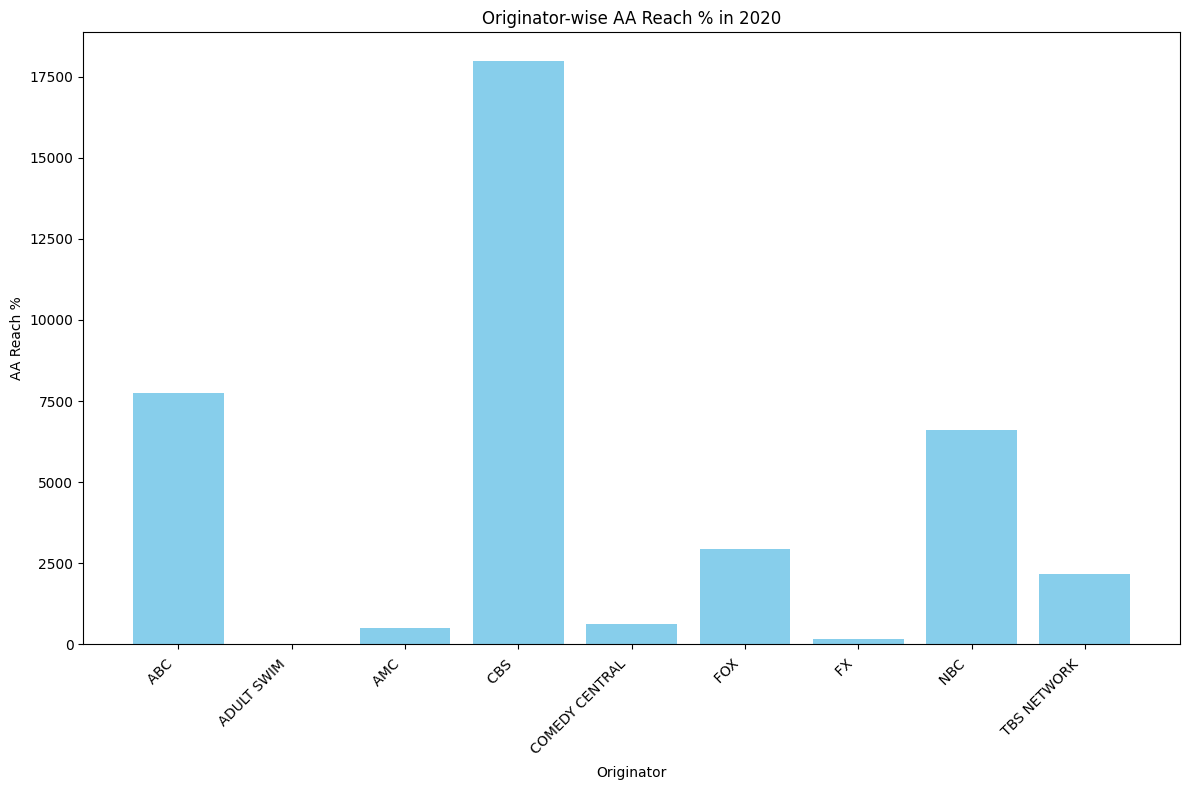

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by originator and calculate total reach for each originator
originator_reach_2020 = nielsen_data_2020.groupby('Originator')['AA Reach%'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(originator_reach_2020['Originator'], originator_reach_2020['AA Reach%'], color='skyblue')
plt.title('Originator-wise AA Reach % in 2020')
plt.xlabel('Originator')
plt.ylabel('AA Reach %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


-----
Explanation:
AA Reach % (or unduplicated audience reach) is a crucial metric in media and advertising. It indicates the percentage of unique individuals or households reached by a particular program or advertisement.
Programs with higher AA Reach % have a broader audience reach, suggesting greater popularity and potential impact.
For advertisers, programs with high AA Reach % offer excellent opportunities for reaching a large and diverse audience.
Understanding the originator of successful programs can provide insights into the networks, channels, or platforms that are most effective in reaching the target audience.






Recommendations:

Advertising Investment: Allocate advertising budgets to programs with high AA Reach % to maximize audience exposure and engagement.
Content Strategy: Analyze successful programs to identify patterns or themes that resonate with the audience and incorporate similar elements into future content strategies.
Partnerships: Collaborate with originators or networks associated with successful programs to leverage their reach and influence.
Audience Targeting: Utilize demographic data to ensure that advertising efforts align with the audience demographics of high-reach programs.
Continuous Monitoring: Regularly monitor AA Reach % and adjust strategies accordingly to capitalize on emerging trends and audience preferences.

#AA Average Frequency - The average number of times households or persons viewed a given program, station, or advertisement during a specific time period, such as one month. This number is derived by dividing the Gross Rating Points (GRP) by the total non-duplicated audience (cume). For example, if a group of programs achieved 30 GRPs and a cume of 20, then the average frequency would be 1.5 exposures per person or household.


#AA Average Frequency with Program

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Average Frequency'].mean().reset_index()


top_10_programs = program_reach_2020.nlargest(10, 'AA Average Frequency')
top_10_programs

,Program,AA Average Frequency
77,BROCKMIRE BONUS MARATHON,2.034718
46,"BIG BANG THEORY, THE",2.022274
31,ATLANTA,2.016693
338,SCHITTS CREEK,1.908837
351,SOUTH SIDE,1.896517
306,"OFFICE, THE",1.836996
189,INSIDE AMY SCHUMER,1.706269
75,BREAKING BAD MARATHON,1.692991
391,WORKAHOLICS,1.650034
48,BLACK NARCISSUS,1.627914


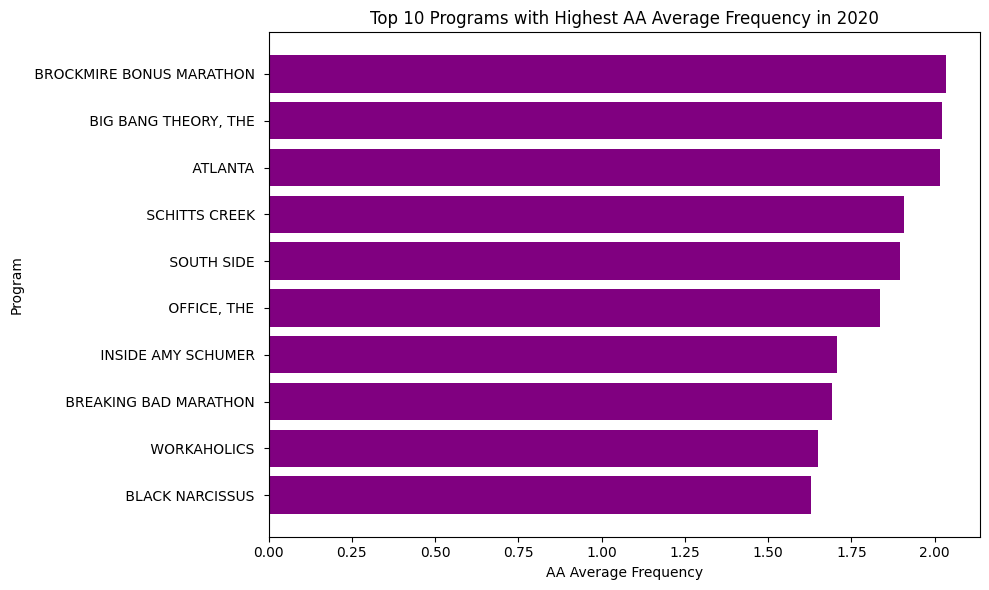

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Average Frequency'].mean().reset_index()


top_10_programs = program_reach_2020.nlargest(10, 'AA Average Frequency')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_programs['Program'], top_10_programs['AA Average Frequency'], color='purple')
plt.title('Top 10 Programs with Highest AA Average Frequency in 2020')
plt.xlabel('AA Average Frequency')
plt.ylabel('Program')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest reach at the top
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your DataFrame is named 'nielsen_data'

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]


program_reach_2020 = nielsen_data_2020.groupby('Program')['AA Average Frequency'].mean().reset_index()


top_10_programs = program_reach_2020.nlargest(10, 'AA Average Frequency')

# Merge top 10 programs with original data to get originator for each program
top_10_programs_with_originator = pd.merge(top_10_programs, nielsen_data, on='Program')[['Program', 'Originator']].drop_duplicates()

print(top_10_programs_with_originator)


                          Program        Originator
0       BROCKMIRE BONUS MARATHON               AMC 
11          BIG BANG THEORY, THE       TBS NETWORK 
13          BIG BANG THEORY, THE               CBS 
13981                    ATLANTA                FX 
14212              SCHITTS CREEK    COMEDY CENTRAL 
14355                 SOUTH SIDE    COMEDY CENTRAL 
14465                OFFICE, THE    COMEDY CENTRAL 
19129         INSIDE AMY SCHUMER    COMEDY CENTRAL 
19239      BREAKING BAD MARATHON               AMC 
19448                WORKAHOLICS    COMEDY CENTRAL 
19712            BLACK NARCISSUS                FX 


#AA Average Frequency with originator

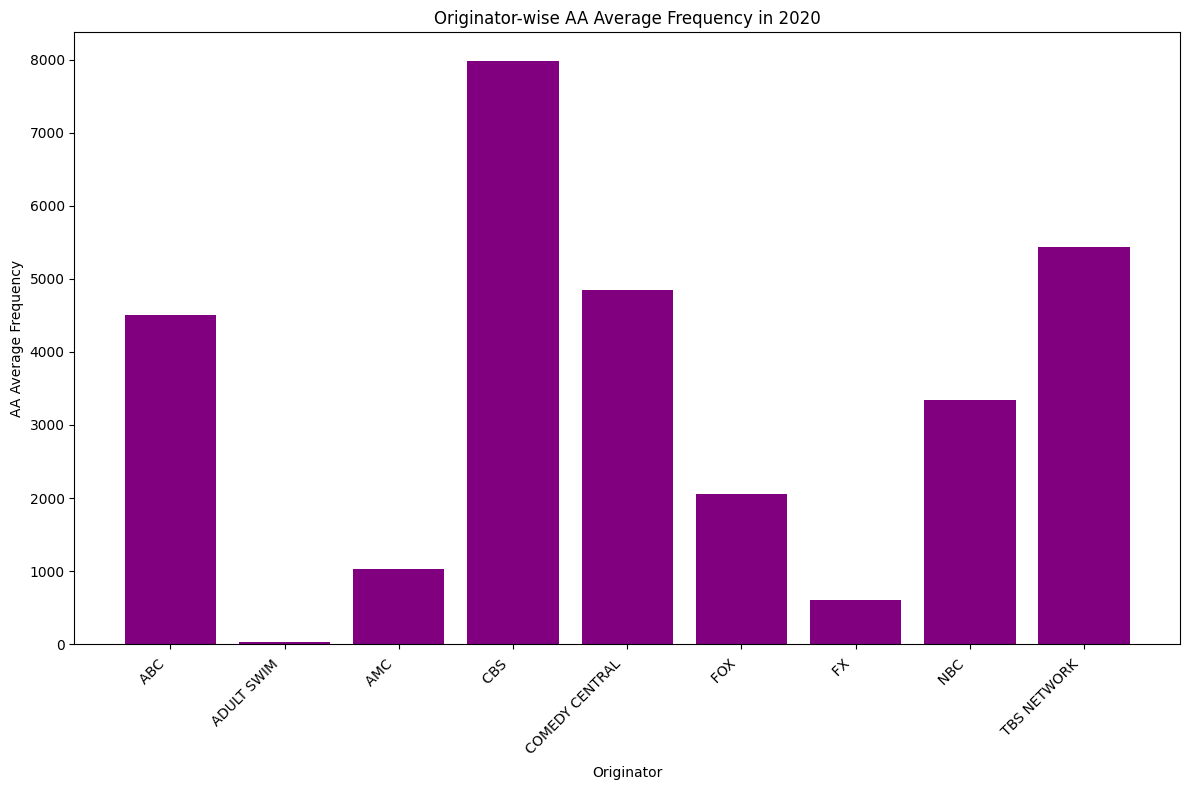

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'nielsen_data'
# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]


originator_reach_2020 = nielsen_data_2020.groupby('Originator')['AA Average Frequency'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(originator_reach_2020['Originator'], originator_reach_2020['AA Average Frequency'], color='purple')
plt.title('Originator-wise AA Average Frequency in 2020')
plt.xlabel('Originator')
plt.ylabel('AA Average Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


-----
Analysis Implications:
Programs or advertisements with higher AA Average Frequency indicate that the audience is engaging with the content multiple times.
Higher average frequency can signify increased viewer retention and potential effectiveness of the content or advertisement in capturing and retaining audience attention.
However, excessively high frequency levels might lead to audience fatigue or irritation, necessitating careful management of ad frequency to avoid negative impacts.



Recommendations:

**Optimized Ad Placement:** Allocate advertising slots to programs or time slots with an optimal balance of reach and frequency to maximize exposure without overexposure.

**Content Variation**: Ensure variety and freshness in content to maintain audience interest and prevent fatigue.

**Frequency Capping:** Implement frequency capping strategies to limit the number of times an advertisement is shown to the same viewer within a given time frame.

**Audience Feedback:** Monitor audience feedback and response to gauge sentiment and adjust frequency strategies accordingly.

**Testing and Optimization:** Continuously test and optimize frequency levels based on performance metrics and audience feedback to achieve the desired balance between reach and engagement.

##Final

Content Selection based on AA Reach %:
Prioritize acquiring content with high AA Reach % to ensure broad audience exposure and maximize the platform's reach.
Look for popular titles or genres that appeal to a wide audience demographic, as indicated by their high reach percentage.


Content Evaluation using AA Average Frequency:
Assess the average number of times households or persons view a particular program or advertisement using AA Average Frequency.
Prioritize content with a high average frequency, indicating strong viewer engagement and retention.


Balancing Reach and Engagement:
Strive for a balanced content library that offers both high-reach content and high-frequency content.
Acquire popular titles with broad appeal to expand the platform's reach while also acquiring content with high average frequency to drive viewer engagement and retention.


Optimizing Content Placement and Promotion:
Strategically feature high-AA Reach % content to attract new users and drive platform growth.
Prominently showcase high-AA Average Frequency content to increase user engagement and enhance viewer satisfaction.


Negotiating Content Licensing Agreements:
Use both AA Reach % and AA Average Frequency metrics during content evaluation and negotiation processes.
Prioritize licensing agreements for content that not only has high reach but also demonstrates strong viewer engagement through high average frequency.


Personalization and Recommendation Algorithms:
Incorporate both AA Reach % and AA Average Frequency metrics into content recommendation algorithms to personalize the user experience.
Recommend content based on a balance of broad appeal (reach) and individual preferences (frequency) to enhance viewer satisfaction and retention.


Monitoring and Optimization:
Continuously monitor AA Reach % and AA Average Frequency metrics for acquired content to assess performance and viewer engagement.
Optimize content placement, promotion strategies, and recommendation algorithms based on real-time data insights to maximize viewer satisfaction and platform growth.


Content Diversity and Experimentation:
Diversify the content library by acquiring a mix of high-reach and high-frequency content across different genres, formats, and production styles.
Experiment with new content acquisitions and innovative titles while also investing in proven performers with strong reach and engagement metrics.



1. **Sought-After Content by Streaming Platforms**:
   - Streaming platforms are likely to seek content that demonstrates high AA Reach % and AA Average Frequency, indicating both broad audience reach and strong viewer engagement.
   - Original scripted series and popular genres such as drama, comedy, and thriller are highly sought after.
   - Content with compelling storylines, diverse characters, and high production values tend to perform well on streaming platforms.
   - Additionally, content that aligns with current trends and cultural themes, such as nostalgia-driven reboots or socially relevant topics, may attract streaming platform interest.

2. **Content Gap Identification**:
   - Analyzing the data can reveal potential content gaps where certain genres or formats are not currently being offered by streaming platforms.
   - Niche genres or underserved audience demographics may present opportunities for TV studios to fill content gaps and cater to specific viewer preferences.
   - Emerging content trends or innovative storytelling formats that have not yet been explored in the streaming space may also represent untapped opportunities for TV studios.

3. **Successful TV Shows in the Streaming Space**:
   - Successful TV shows in the streaming space are those that combine high AA Reach % with strong viewer engagement, as indicated by AA Average Frequency.
   - Original scripted series with multiple seasons and a loyal fan base tend to perform well on streaming platforms.
   - Content that generates buzz, drives social media conversations, and fosters fan communities can contribute to the success of TV shows in the streaming space.
   - Adaptations of popular books, comics, or existing intellectual properties (IPs) may also resonate with streaming platform audiences, leveraging existing fan bases and brand recognition.

4. **Recommendations for TV Studios**:
   - Focus on developing and pitching original scripted series in popular genres such as drama, comedy, and thriller, ensuring high production quality and engaging storytelling.
   - Explore opportunities to fill content gaps by identifying underserved genres or audience demographics that are not currently being addressed by streaming platforms.
   - Prioritize content that has the potential for long-term success and multiple seasons, as streaming platforms often seek ongoing series with a strong viewer following.
   - Consider leveraging existing intellectual properties or collaborating with established creators and talent to increase the appeal and marketability of TV shows.
   - Continuously monitor industry trends, audience preferences, and streaming platform requirements to adapt content strategies and remain competitive in the evolving streaming landscape.

By leveraging insights from AA Reach %, AA Average Frequency, and other relevant metrics, TV studios can tailor their content development and acquisition strategies to meet the demands of streaming platforms and capitalize on emerging opportunities in the streaming space.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'nielsen_data'

# Convert 'Date' column to datetime format
nielsen_data['Date'] = pd.to_datetime(nielsen_data['Date'])

# Filter data for the year 2020
nielsen_data_2020 = nielsen_data[nielsen_data['Date'].dt.year == 2020]

# Group data by program and find the mean AA Reach % and AA Average Frequency for each program
program_metrics_2020 = nielsen_data_2020.groupby('Program').agg({'AA Reach%': 'mean', 'AA Average Frequency': 'mean', 'Originator': 'first'}).reset_index()

# Filter programs with both high AA Reach % and high AA Average Frequency
top_programs_high_reach_and_frequency = program_metrics_2020[
    (program_metrics_2020['AA Reach%'] > program_metrics_2020['AA Reach%'].quantile(0.9)) &
    (program_metrics_2020['AA Average Frequency'] > program_metrics_2020['AA Average Frequency'].quantile(0.9))
]

# Sort the filtered programs by AA Reach % and AA Average Frequency in descending order
top_10_programs = top_programs_high_reach_and_frequency.nlargest(10, ['AA Reach%', 'AA Average Frequency'])

# Display top 10 programs with both high AA Reach % and high AA Average Frequency along with their originators
print(top_10_programs[['Program', 'AA Reach%', 'AA Average Frequency', 'Originator']])


                      Program  AA Reach%  AA Average Frequency Originator
65               BLUE BLOODS    3.626210              0.880617       CBS 
101               CHICAGO PD    3.458398              0.882171       NBC 
182           GREY'S ANATOMY    2.810904              0.875331       ABC 
124           CRIMINAL MINDS    2.484509              0.877924       CBS 
125   CRIMINAL MINDS 10PM-SP    2.311462              0.880267       CBS 


<ipython-input-29-8c06e1501315>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


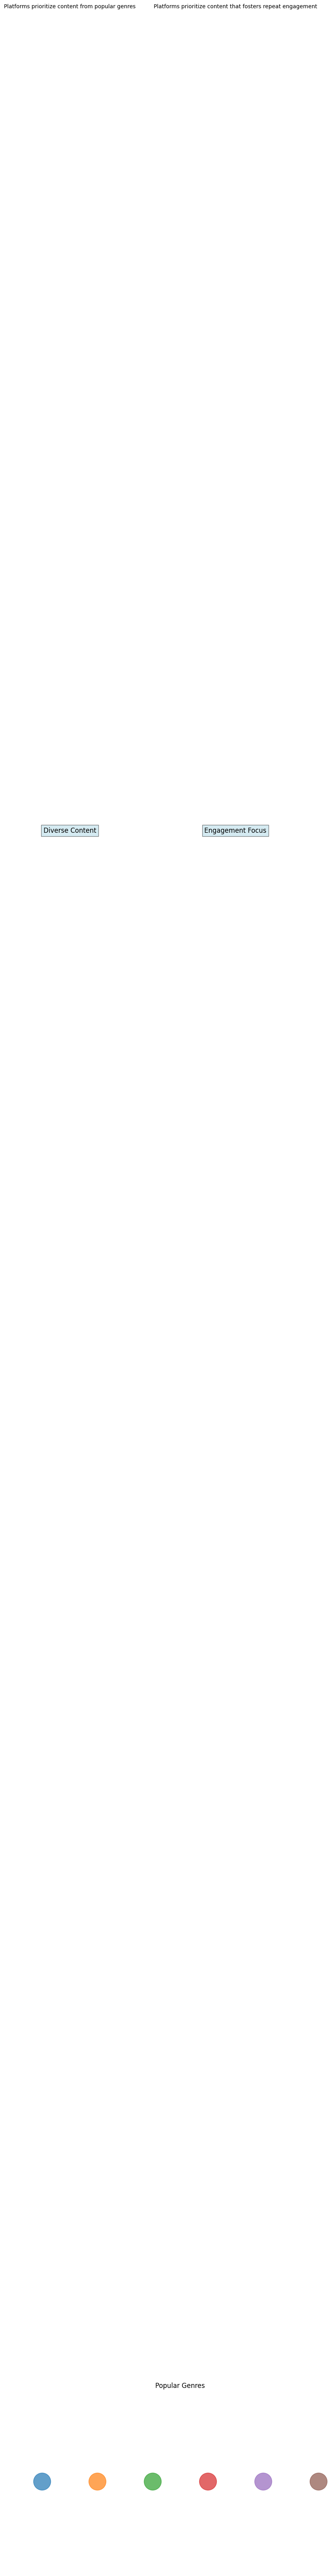

In [ ]:
import matplotlib.pyplot as plt

# Data for popular genres
genres = ['Crime Procedural', 'Medical Drama', 'Family-Oriented', 'Sitcoms', 'Critically Acclaimed', 'Comedies']

# Colors for each genre
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting the circles representing genres
plt.figure(figsize=(10, 6))
for i, genre in enumerate(genres):
    plt.scatter(i, 0, s=1000, color=colors[i], alpha=0.7)  # Using a fixed size for circles

# Adding text boxes for key insights
plt.text(0.5, 1, 'Diverse Content', fontsize=12, ha='center', bbox=dict(facecolor='lightblue', alpha=0.5))
plt.text(3.5, 1, 'Engagement Focus', fontsize=12, ha='center', bbox=dict(facecolor='lightblue', alpha=0.5))
plt.text(0.5, 1.5, 'Platforms prioritize content from popular genres', fontsize=10, ha='center')
plt.text(3.5, 1.5, 'Platforms prioritize content that fosters repeat engagement', fontsize=10, ha='center')

# Adjusting plot settings
plt.title('Popular Genres')
plt.axis('off')  # Hide axis
plt.tight_layout()

# Show plot
plt.show()
